# CSUREMM 2025 Project
### Topic: Using Cryptocurrency Volatility to Predict Labor Participation Rate and Macroeconomic Change in US

#### Tianyi, Annie, Alice
#### Updated May 29, 2025

### 0.Background of study

fill in research later

### Methodology visualized:

citation: https://onlinelibrary.wiley.com/doi/full/10.1002/for.2930

# 0. Data Testing
#### Linear AutoRegression of Labor Participation (Monthly, 2017-9 to 2025-1) on currencies

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/var/folders/91/zhth7_q95v1c0mrzzznv18_w0000gn/T/ipykernel_13397/825027842.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load data
df = pd.read_excel('/Users/tianyishen/Downloads/Civilian Labor Force Participation Rate.xlsx')  # Must contain: 'Month', 'Tether-EUR LogVol', 'Labor data'

# Ensure date is datetime and set index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

## Tether

In [3]:
# Create lagged log volatility as predictor
df['Lagged_LogVol'] = df['Tether'].shift(1)

# Drop NA (first row will be NaN due to lag)
df = df.dropna()

X = df['Lagged_LogVol']
y = df['Labor data']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Labor data   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4.829
Date:                Thu, 29 May 2025   Prob (F-statistic):             0.0307
Time:                        15:40:16   Log-Likelihood:                -78.766
No. Observations:                  88   AIC:                             161.5
Df Residuals:                      86   BIC:                             166.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            63.4925      0.493    128.917

## Bitcoin

In [4]:
# Create lagged log volatility as predictor
df['Lagged_LogVol'] = df['Bitcoin'].shift(1)

# Drop NA (first row will be NaN due to lag)
df = df.dropna()

X = df['Lagged_LogVol']
y = df['Labor data']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Labor data   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2595
Date:                Thu, 29 May 2025   Prob (F-statistic):              0.612
Time:                        15:40:16   Log-Likelihood:                -80.505
No. Observations:                  87   AIC:                             165.0
Df Residuals:                      85   BIC:                             169.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            62.2713      0.292    213.425

## USD

In [5]:
# Create lagged log volatility as predictor
df['Lagged_LogVol'] = df['USD'].shift(1)

# Drop NA (first row will be NaN due to lag)
df = df.dropna()

X = df['Lagged_LogVol']
y = df['Labor data']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Labor data   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     5.195
Date:                Thu, 29 May 2025   Prob (F-statistic):             0.0252
Time:                        15:40:16   Log-Likelihood:                -77.520
No. Observations:                  86   AIC:                             159.0
Df Residuals:                      84   BIC:                             163.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            60.4886      0.847     71.441

# Plotting

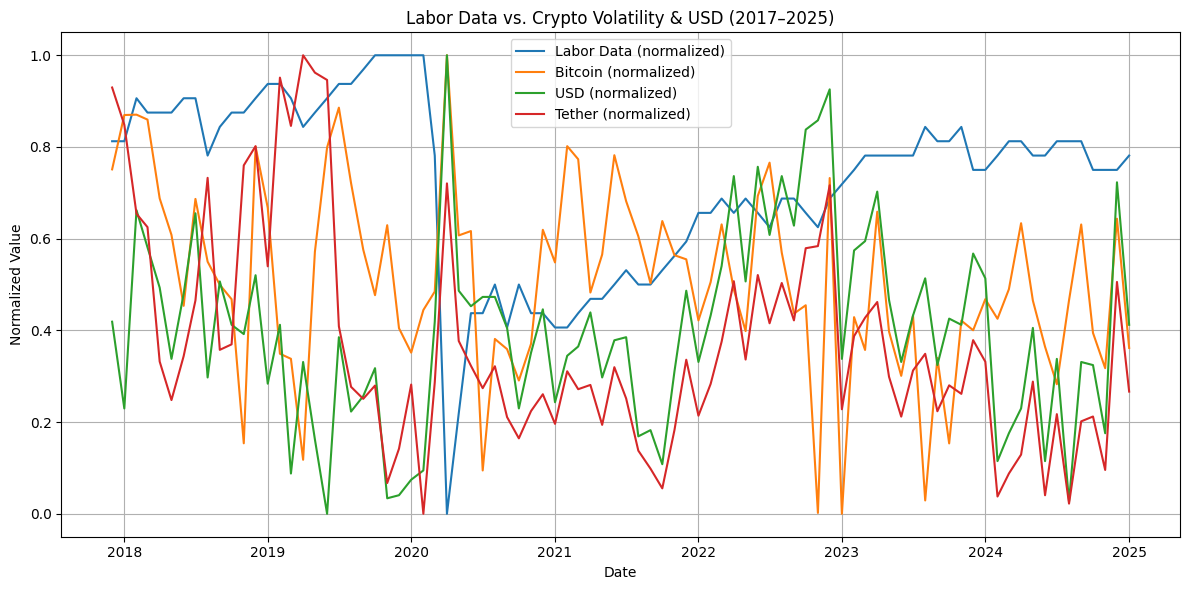

In [6]:
# Plot all four columns on the same graph
plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df[['Labor data', 'Bitcoin', 'USD', 'Tether']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot
plt.plot(df_normalized.index, df_normalized['Labor data'], label='Labor Data (normalized)')
plt.plot(df_normalized.index, df_normalized['Bitcoin'], label='Bitcoin (normalized)')
plt.plot(df_normalized.index, df_normalized['USD'], label='USD (normalized)')
plt.plot(df_normalized.index, df_normalized['Tether'], label='Tether (normalized)')

plt.title('Labor Data vs. Crypto Volatility & USD (2017–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
